<a href="https://colab.research.google.com/github/jingwoo4710/ds-blog/blob/master/Resubmit_09042020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Titanic Data Description
`Titanic Data`의 구성은 총 887명의 사람의 8개의 attributes 로 구성되어 있다. 특성을 나타내는 8개의 column 은 각 각
1. Survived : 생존여부
  * 0 = No, 1 = Yes
2. Pclass : 티켓의 클래스 
  * 1st = Upper, 2nd = Middle, 3rd = Lower
3. Name : 이름
4. Sex : 성별
5. Age : 나이
6. Siblings/Spouses Aboard : # of siblings / spouses aboard the Titanic
7. Parents/Children Aboard : # of parents / children aboard the Titanic
8. Fare : 요금
> Siblings/Spouses Aboard (SSA) : 총 형제, 자매, 배우자 명 수의 총 합
> Parents/Children Aboard (PCA) : 총 아버지, 어머니, 아들, 딸 명 수의 총 합


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

titanic = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')

data = titanic.copy()

data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [27]:
data.shape

(887, 8)

# 2. 주어진 데이터의 간략한 정보들
간단한 `시각화`를 통해 대략적인 정보들을 뽑아보자.

In [71]:
def plot_pie_chart (col):
  feature_ratio = data[col].value_counts(sort=False)
  feature_size = feature_ratio.size
  feature_index = feature_ratio.index
  alive = data[data['Survived'] == 1][col].value_counts()
  dead = data[data['Survived'] == 0][col].value_counts()

  plt.plot(aspect='auto')
  plt.pie(feature_ratio, labels=feature_index, autopct='%1.1f%%')
  plt.title( col + '\'s ratio in total')
  plt.show()

  for name in feature_index:
    plt.plot(aspect='equal')
    plt.pie([alive[name], dead[name]], labels=['Survivied', 'Dead'], autopct='%1.1f%%')
    plt.title( str(name) + '\'s ratio')
    plt.show()
 


## 2.1) `Sex`, `Pclass` plot
> 성별은 0 또는 1의 value를 Pclass 는 1, 2, 3의 vlaue를 가진다. 즉 value 의 카테고리가 다소 적기 때문에 파이 차트를 통하여, 쉽게 한눈에 알아볼 수 있다.

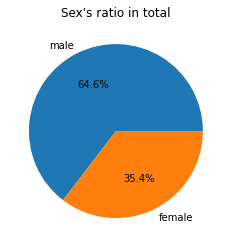

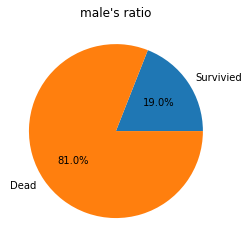

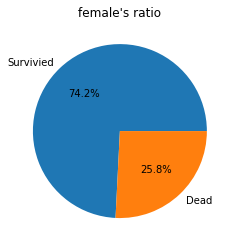

In [69]:
plot_pie_chart('Sex')

> 파이차트는 남녀를 기준으로 생존율을 나타낸다. 제일 첫번째 파이차트에서 알 수 있듯이, 여자의 생존율이 65%, 남자의 생존율은 35% 이다. 게다가, 남자중의 81%가 사망, 19%가 생존하였다. 반대로, 여자는 대략 74%가 생존 26%가 사망하였다. 이 차트들을 통해 알 수 있는 것은 남자의 생존율이 극명히 여자에 비해서 낮음을 알 수 있다.

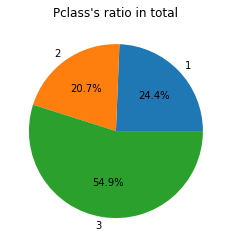

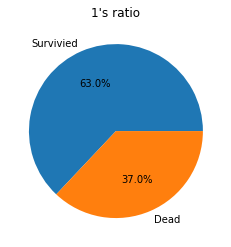

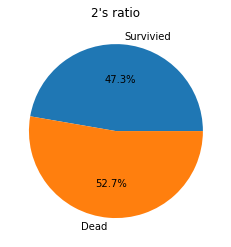

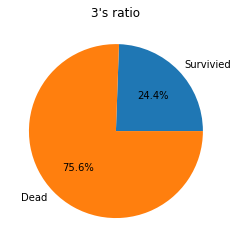

In [72]:
plot_pie_chart('Pclass')

> 파이차트는 좌석 클래스에 따라 분류되어져 있다. 가장 낮은 등급의 좌석을 이용하는 사람들은 전체의 절반이상이 이용하였고, 일등급, 이등급 좌석은 각각 약 20%, 25% 이다. 가장 눈에 뛰는건, 상위 등급에 가까울수록 생존율이 급격히 올라갔다는 사실이다. 일등급 좌석을 이용한 사람들의 생존율은 약 65%에 해당하지만, 3등급 좌석의 이용객은 25%도 되지 않는다. 

### 2.2) `Siblings/Spouses Aboard`, `Parents/Children Aboard` plot
> 비교적 다양한 값들을 가지고 있어서, 다양한 값들을 효율적으로 표현 해줄 수 있는 바 차트를 선택했다.

In [102]:
def plot_bar_chart(col):
  survived = data[data['Survived']==1][col].value_counts()
  dead = data[data['Survived']==0][col].value_counts()
  df = pd.DataFrame([survived,dead])
  df.index = ['Survived','Dead']
  df.plot(kind='bar',stacked=True, figsize=(10,5))

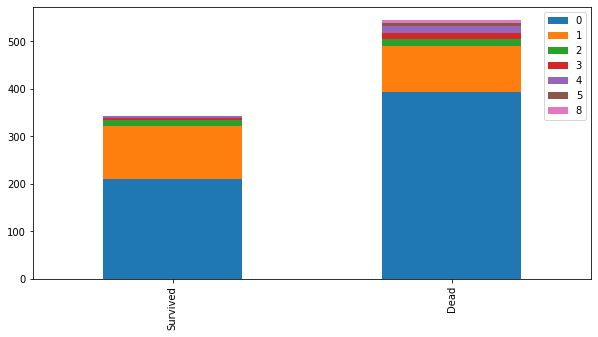

In [80]:
plot_bar_chart('Siblings/Spouses Aboard')

> 형제, 자매, 또는 배우자의 영향을 알아볼 수 있는 바 차트이다. 전체적인 분포는 생존자들 또는 사망자들 중에서 60%가 넘는 사람들이 외동이거나, 배우자가 없는 사람들이다. 

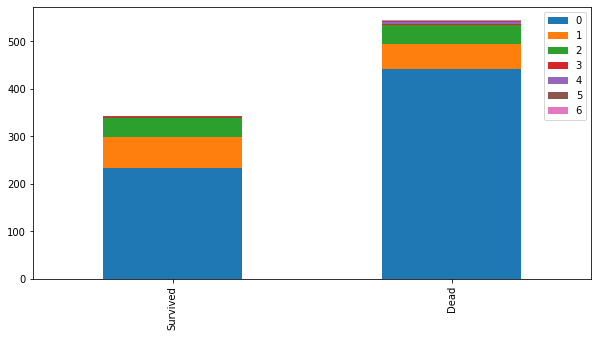

In [81]:
plot_bar_chart('Parents/Children Aboard')

> 전반적으로 같은 양상을 보여주는 차트이다. 대부분의 사람들은 가족이 없는 사람이 많았으며, 생존자 사망자 모두 비슷한 양상을 보여준다.

### 2.3) `Fare` plot
> 앞의 모든 Column 보다 훨씬 더 많은 range의 value 를 담고 있다. 그렇기 때문에, 구간 별로 category 를 설정하여 효율적으로 볼 수 있게 하였다.

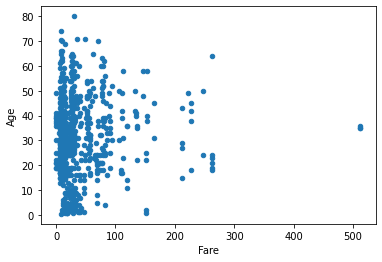

In [110]:
data = data.loc[data["Fare"] > 0]

data.plot.scatter('Fare', 'Age')

In [112]:
data['Category Fare'] = pd.cut(data.Fare, bins = [0, 100, 200, 500], include_lowest=True)

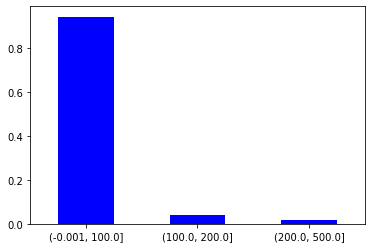

In [118]:
ax = data['Category Fare'].value_counts(sort=False, normalize = True).plot.bar(rot=0, color="b", figsize=(6,4))
plt.show()

> 거의 99%의 사람들이 (0, 100) 사이의 운임요금을 내어 탑승하였고, (100, 200) 은 0.05%, (200, 500) 은 가장 넓은 범위의 카테고리 임에도 불구하고, 가장 적은 사람들을 나타낸다.

# 3. 결론
> 다양한 사람들이 이용한 타이타닉호에서 간단한 차트들을 통해서 각각의 attributes 들의 특성을 알아보았다. 먼저 생존율의 문제에 있어서 `Sex`, `Pclass` 에 따라 확연히 달라짐을 알 수 있었다. 즉, 여자가 남자보다 생존율이 2배가량 높으며, 가장 높은 등급에 좌석을 이용 할 수록 생존율이 올라감을 확인하였다. 하지만, `Fare` 그래프에서 알 수 있듯이 가장 높은 등급의 좌석을 사용한 사람들은 극 소수이며 95% 사람들이 100 이하의 요금을 내고 탑승 하였다. 그러므로, `Pclass`와 `Fare` 는 서로 비슷한 바를 나타낸다고도 볼 수 있는데, 이는 높은 등급의 좌석은 높은 가격을 줘야하기 때문이다. `Siblings/Spouses Aboard`, `Parents/Children Aboard` 는 생존자 사망자 비슷한 데이터를 보였고, 대부분 가족이 없거나 결혼을 하지 않은 사람들로 볼 수 있다. 이 사실이 생존율과 연관이 있는지는 좀 더 알아 볼 필요가 있다.